In [ ]:
%pip install mesa

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

from model import CampusModel
from visualization import draw

In [2]:
G1 = nx.read_graphml("data/distances-graph.graphml")
G2 = nx.read_graphml("data/width-graph.graphml")

G = G1.copy()

In [3]:
tree = ET.parse("data/distances-graph.graphml")
root = tree.getroot()

ns = {
    "g": "http://graphml.graphdrawing.org/xmlns",
    "y": "http://www.yworks.com/xml/graphml"
}

nodeTypes = {'#FFCC00': 'building',
             '#33CCCC': 'court',
             '#808080': 'temporary-point',
             '#FF0000': 'restaurant',
             '#333333': 'parking',
             '#993366': 'entry/exit',
             '#FF00FF': 'outpatient',
             '#008000': 'bank',
             '#FFCC99': 'bathroom',
             '#008080': 'turnstile'}

nodeAdditionalInformation = {}

for node in root.findall(".//g:node", ns):
    nodeID = node.attrib['id']
    for data in node:
        for ShapeNode in data:
            for x in ShapeNode:
                if 'Fill' in str(x):
                    nodeColor = x.attrib['color']
                    nodeAdditionalInformation[nodeID] = nodeTypes[nodeColor]

for id, data in G.nodes(data=True):
    data['type'] = nodeAdditionalInformation[id]

In [4]:
for u, v, data in G.edges(data=True):
    data['distance'] = int(data['label'])
    data["width"] = int(G2.edges[u, v]['label'])

In [5]:
G = G.to_undirected()

In [8]:
model = CampusModel(G, agent_qtd=1)


{'name': 'law', 'periods': {'morning': 300, 'afternoon': 0, 'evening': 240}, 'class_buildings': ['n2', 'n45']} n213 n2


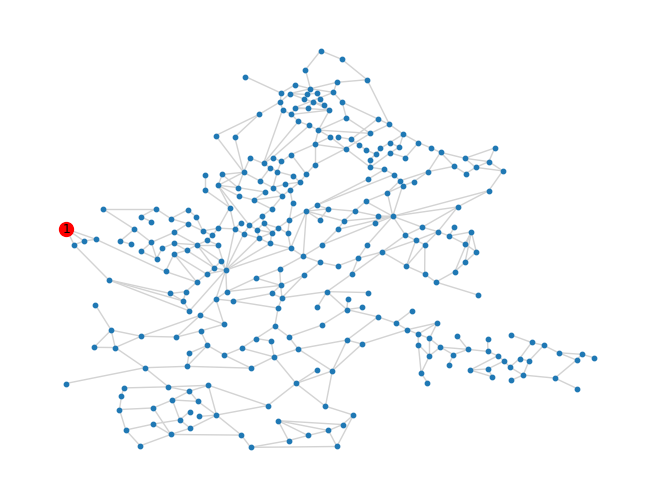

['n213', 'n216', 'n212', 'n211', 'n210', 'n209', 'n75', 'n295', 'n294', 'n208', 'n73', 'n119', 'n124', 'n239', 'n126', 'n241', 'n242', 'n243', 'n244', 'n127', 'n132', 'n160', 'n2']
n213 n216

Tempo: 16



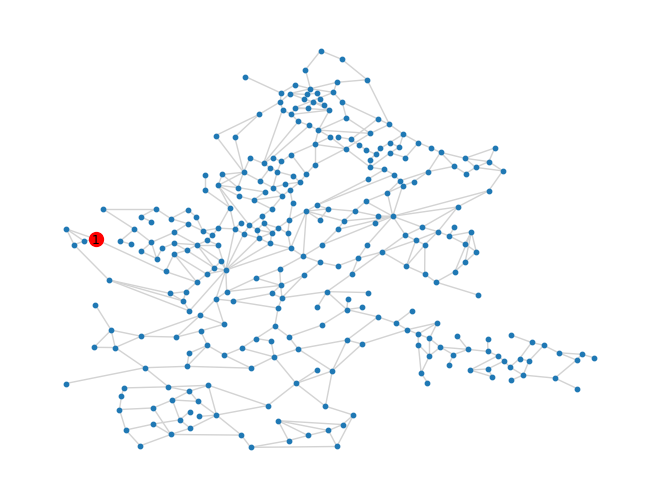

n216 n212

Tempo: 64



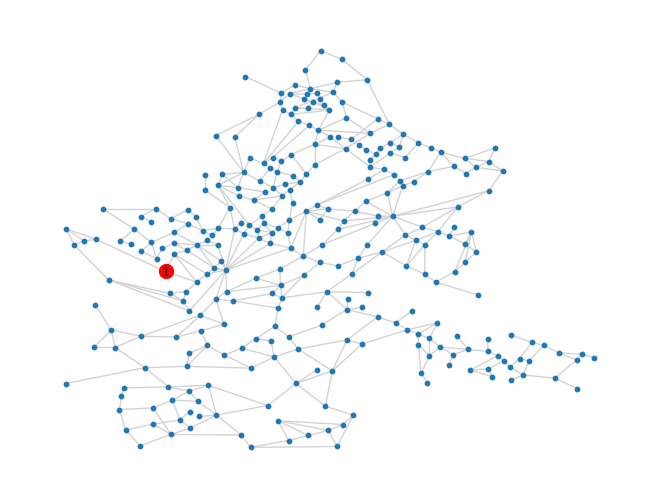

n212 n211

Tempo: 88



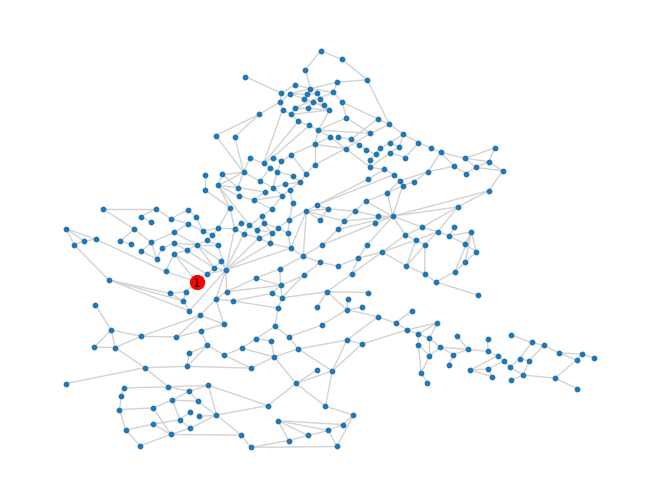

n211 n210

Tempo: 102



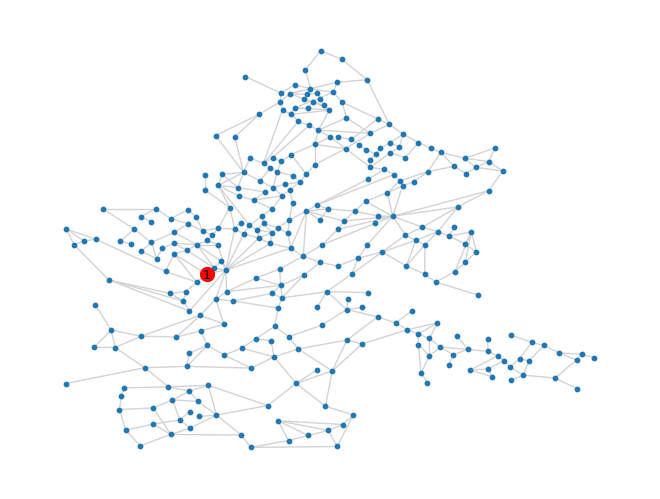

n210 n209

Tempo: 114



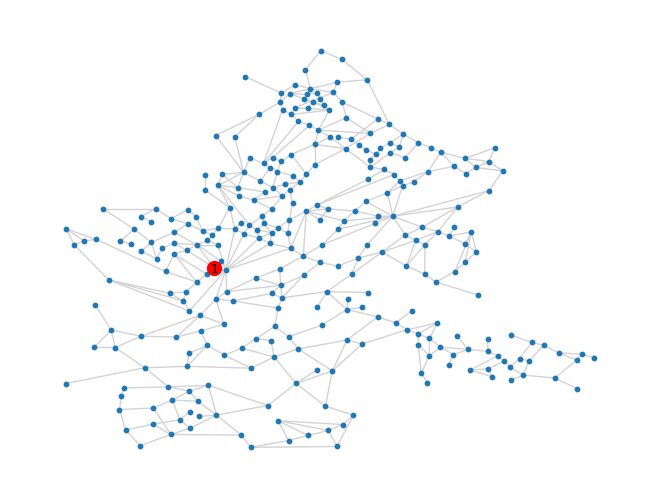

n209 n75

Tempo: 134



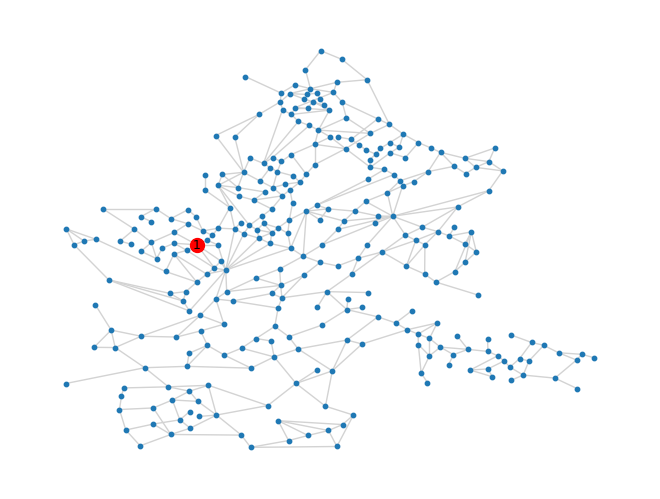

n75 n295

Tempo: 144



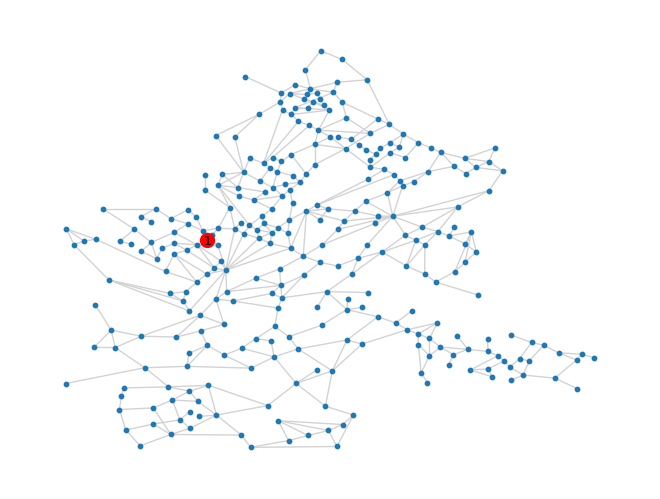

n295 n294

Tempo: 154



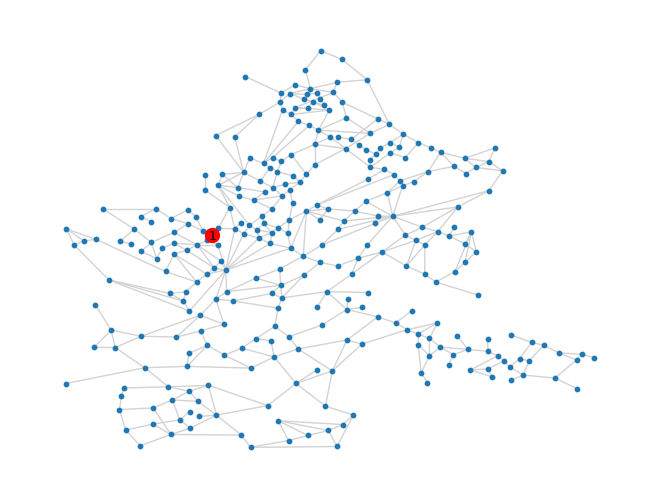

n294 n208

Tempo: 163



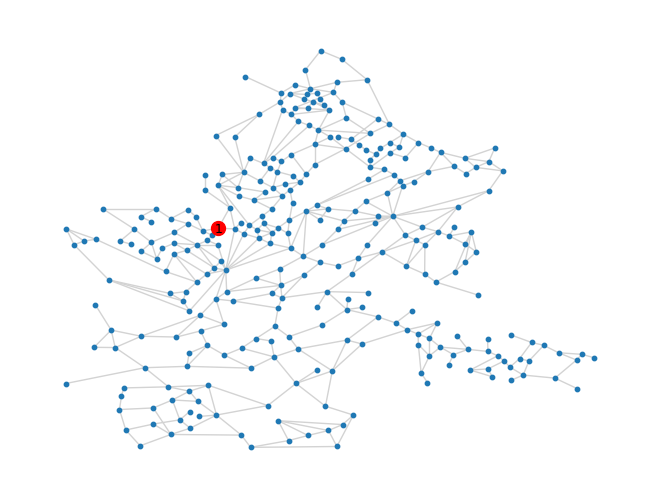

n208 n73

Tempo: 177



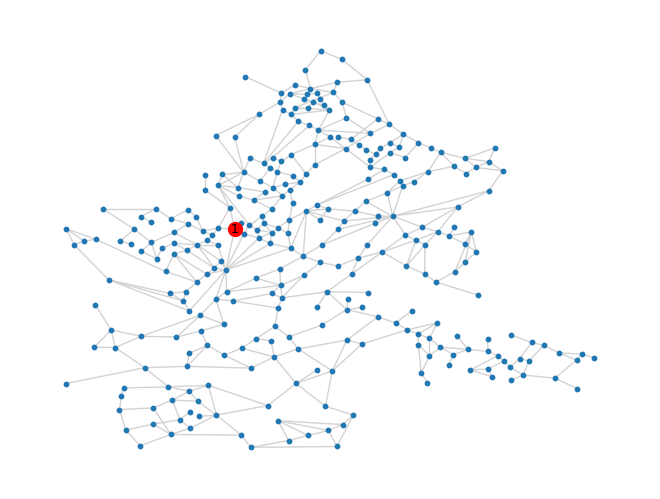

n73 n119

Tempo: 183



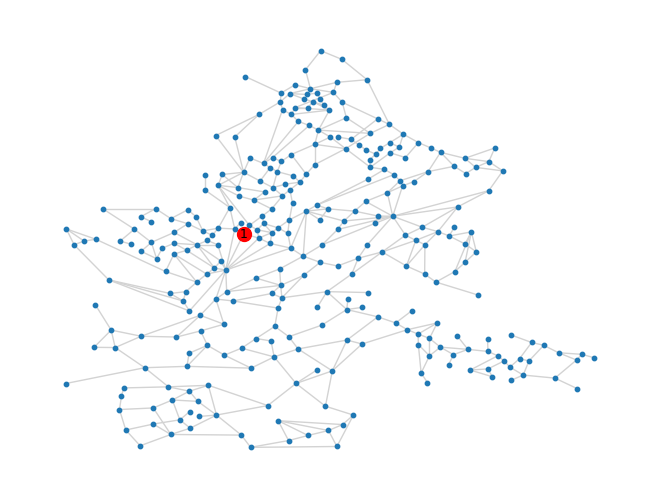

n119 n124

Tempo: 201



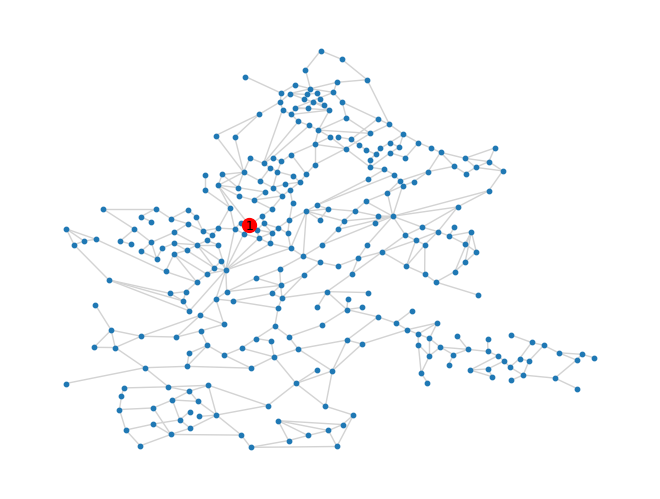

n124 n239

Tempo: 213



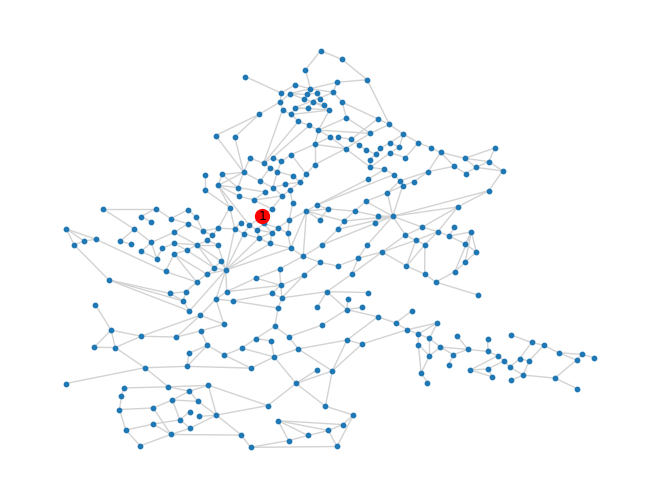

n239 n126

Tempo: 228



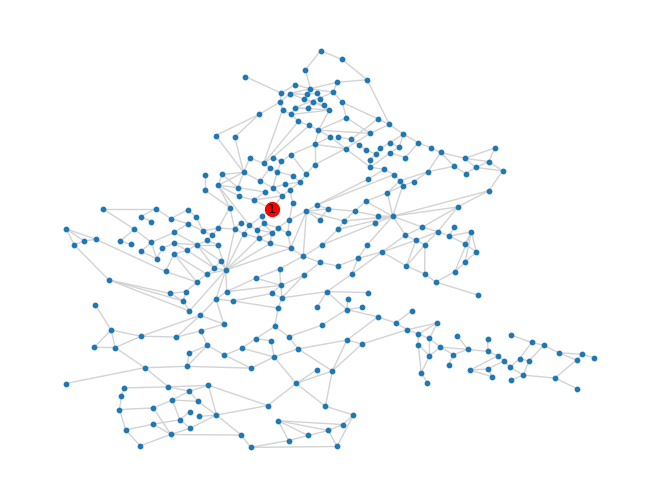

n126 n241

Tempo: 238



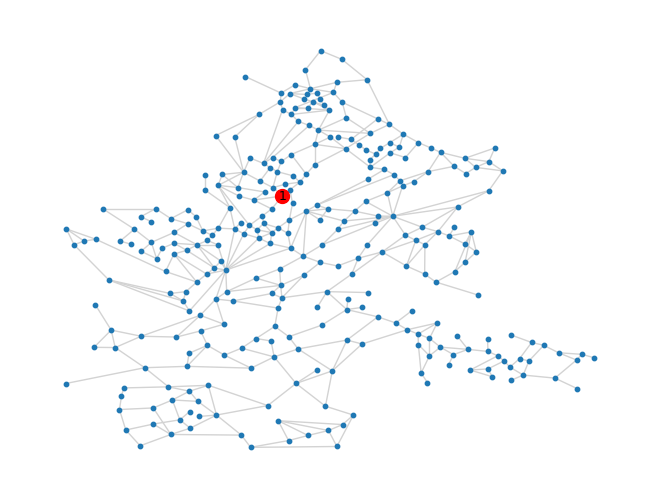

n241 n242
n241 n237

Tempo: 273



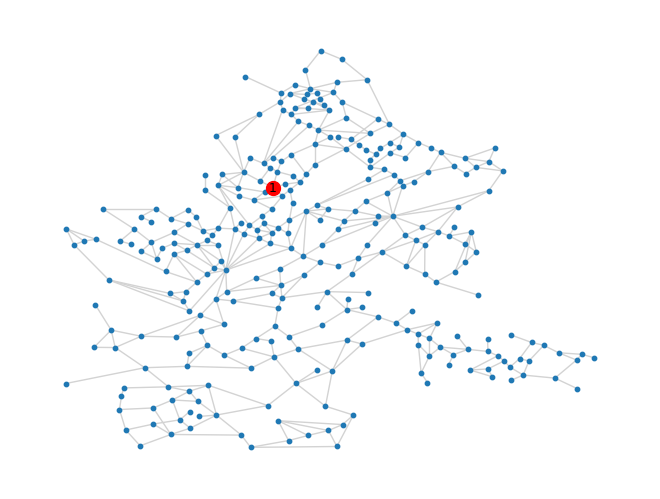

['n237', 'n234', 'n235', 'n236', 'n132', 'n160', 'n2']
n237 n234

Tempo: 297



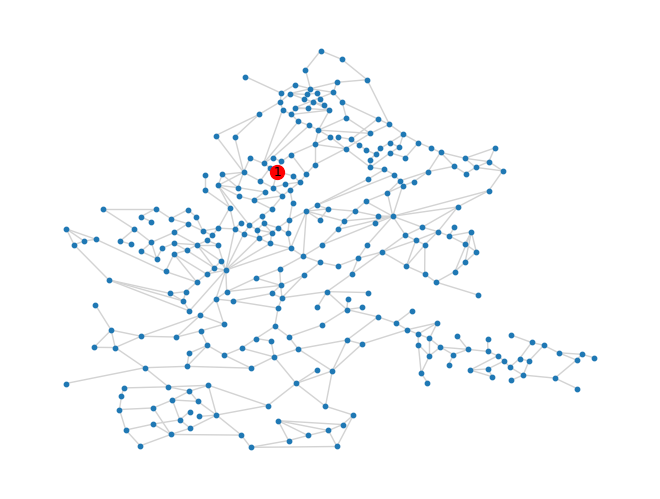

n234 n235

Tempo: 304



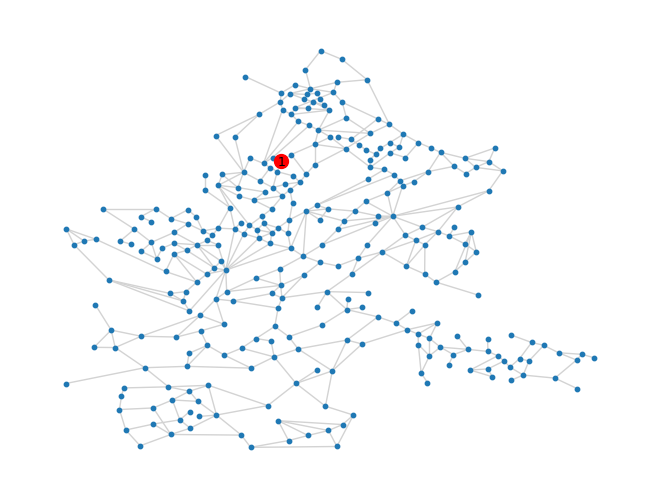

n235 n236

Tempo: 310



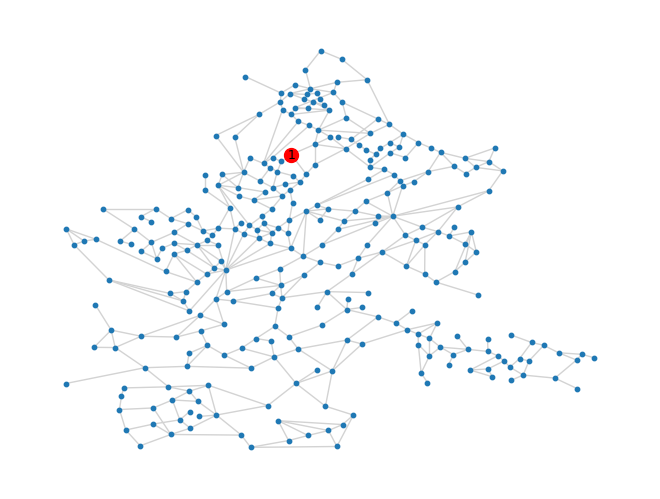

n236 n132

Tempo: 318



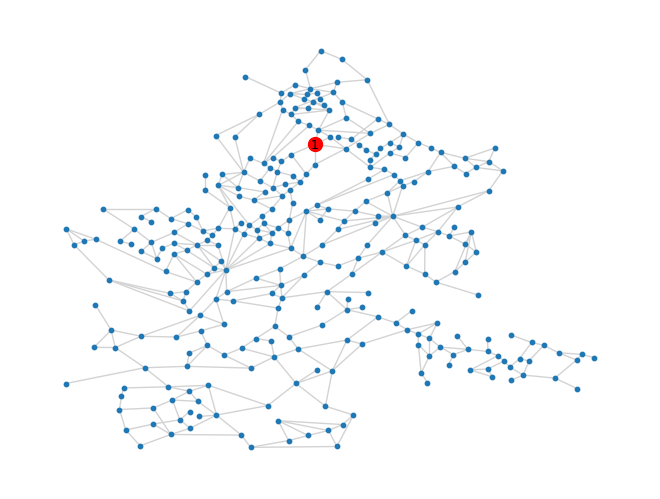

n132 n160

Tempo: 331



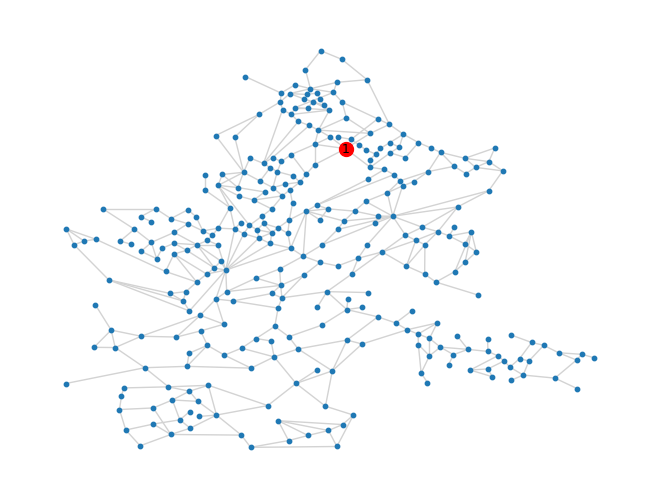

n160 n2

Tempo: 333



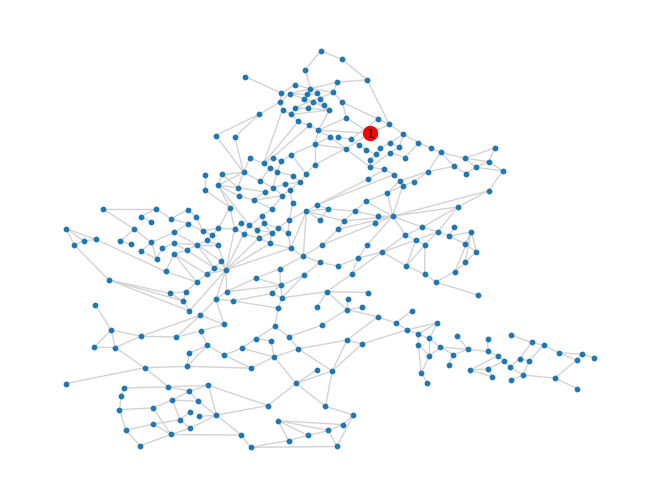

In [9]:
pos = {
    n: (float(data['x']), float(data['y'])) for n, data in G.nodes(data=True)
}

plt.ion()

time = 10000

draw(model, pos)
for i in range(time):
    model.step()
    result = model.anyone_moved
    if result:
        print(f"\nTempo: {i}\n")
        draw(model, pos)

plt.ioff()
plt.show()